## TC 3007B
### Word Embeddings

#### Karen Cebreros López - A01704254
#### Fermín Méndez García - A01703366
#### Emiliano Vásquez Olea - A01707035
#### Diego Emilio Barrera Hdz - A01366802
#### José Ángel García López - A01275108

<br>

#### Activity 1: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project: 
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (10%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    - Functionality (90%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (15% each for a total of 30%)
       - Similarity function (30%)
       - Analogy function (30%)
|



#### Import libraries

In [44]:
# Librerías
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

In [13]:
PATH = '/Users/karencl/Downloads/glove/glove.6B.300d.txt' 
emb_dim = 50

In [69]:
def create_emb_dictionary(path):
    ''' Función que crea el diccionario de los embeddings
    Args:
        path - path donde se encuentra el archivo
    Return:
        embeddings_dict - diccionario de embeddings
    '''
    embeddings_dict = {}

    # Abre el archivo
    with open(path, 'r', encoding='utf-8') as file:
        # Lee cada línea del archivo y crea un diccionario de palabras con sus valores
        for line in file:
            values = line.split()

            word = values[0]
            vector_per_word = []

            for num in values[1:]:
                vector_per_word.append(float(num))

            # Asigna el vector de valores a la palabra
            embeddings_dict[word] = vector_per_word
    
    # Regresa el diccionario
    return embeddings_dict

In [70]:
# Se manda a llamar la función "create_emb_dictionary" para crear el diccionario de embeddings
embeddings_dict = create_emb_dictionary(PATH)
embeddings_dict

{'the': [0.04656,
  0.21318,
  -0.0074364,
  -0.45854,
  -0.035639,
  0.23643,
  -0.28836,
  0.21521,
  -0.13486,
  -1.6413,
  -0.26091,
  0.032434,
  0.056621,
  -0.043296,
  -0.021672,
  0.22476,
  -0.075129,
  -0.067018,
  -0.14247,
  0.038825,
  -0.18951,
  0.29977,
  0.39305,
  0.17887,
  -0.17343,
  -0.21178,
  0.23617,
  -0.063681,
  -0.42318,
  -0.11661,
  0.093754,
  0.17296,
  -0.33073,
  0.49112,
  -0.68995,
  -0.092462,
  0.24742,
  -0.17991,
  0.097908,
  0.083118,
  0.15299,
  -0.27276,
  -0.038934,
  0.54453,
  0.53737,
  0.29105,
  -0.0073514,
  0.04788,
  -0.4076,
  -0.026759,
  0.17919,
  0.010977,
  -0.10963,
  -0.26395,
  0.07399,
  0.26236,
  -0.1508,
  0.34623,
  0.25758,
  0.11971,
  -0.037135,
  -0.071593,
  0.43898,
  -0.040764,
  0.016425,
  -0.4464,
  0.17197,
  0.046246,
  0.058639,
  0.041499,
  0.53948,
  0.52495,
  0.11361,
  -0.048315,
  -0.36385,
  0.18704,
  0.092761,
  -0.11129,
  -0.42085,
  0.13992,
  -0.39338,
  -0.067945,
  0.12188,
  0.16707,
  0

In [71]:
# Serialize
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings

In [76]:
def show_n_first_words(path, n_words):
    ''' Función que muestra algunas de las palabras con 
        sus valores (desde el inicio del archivo)
    Args:
        path - path donde se encuentra el archivo
        n_words - cantidad de palabras que se van a mostrar
    '''
    with open(path, 'r') as f:
        for i, line in enumerate(f):
            # Se imprimen las N primeras palabras con sus embeddings
            print(line.split(), len(line.split()[1:]))
            
            if i>=n_words: 
                break

In [75]:
# Se manda a llamar la función "show_n_first_words" para mostrar las primeras 5 palabras con sus valores
show_n_first_words(PATH, 5)

['the', '0.04656', '0.21318', '-0.0074364', '-0.45854', '-0.035639', '0.23643', '-0.28836', '0.21521', '-0.13486', '-1.6413', '-0.26091', '0.032434', '0.056621', '-0.043296', '-0.021672', '0.22476', '-0.075129', '-0.067018', '-0.14247', '0.038825', '-0.18951', '0.29977', '0.39305', '0.17887', '-0.17343', '-0.21178', '0.23617', '-0.063681', '-0.42318', '-0.11661', '0.093754', '0.17296', '-0.33073', '0.49112', '-0.68995', '-0.092462', '0.24742', '-0.17991', '0.097908', '0.083118', '0.15299', '-0.27276', '-0.038934', '0.54453', '0.53737', '0.29105', '-0.0073514', '0.04788', '-0.4076', '-0.026759', '0.17919', '0.010977', '-0.10963', '-0.26395', '0.07399', '0.26236', '-0.1508', '0.34623', '0.25758', '0.11971', '-0.037135', '-0.071593', '0.43898', '-0.040764', '0.016425', '-0.4464', '0.17197', '0.046246', '0.058639', '0.041499', '0.53948', '0.52495', '0.11361', '-0.048315', '-0.36385', '0.18704', '0.092761', '-0.11129', '-0.42085', '0.13992', '-0.39338', '-0.067945', '0.12188', '0.16707', '0

### Plot some embeddings

In [131]:
def plot_embeddings(words2show, embeddings_dict, func):
    ''' Función que hace el plot de los embeddings por reducción de dimensionalidad
    Args:
        words2show - palabras a graficar
        embeddings_dict - diccionario de embeddings
        func - método de reducción de dimensiones (PCA o TSNE)
    '''
    # Extraer los embeddings para las palabras especificadas y convertirlas en un arreglo
    selected_embeddings = []
    for word in words2show:
        if word in embeddings_dict:
            selected_embeddings.append(embeddings_dict[word])
    
    selected_embeddings_array = np.array(selected_embeddings)

    # Seleccionar el método de reducción de dimensionalidad
    if func == PCA:
        reducer = PCA(n_components=2)
    elif func == TSNE:
        reducer = TSNE(n_components=2)
    else:
        raise ValueError("Error: el método seleccionado no es PCA o TSNE.")

    # Se aplica la reducción de dimensionalidad
    reduced_embeddings = reducer.fit_transform(selected_embeddings_array)

    # Se crea el gráfico
    plt.figure(figsize=(10, 10))
    for i, word in enumerate(words2show):
        if word in embeddings_dict:
            # Se grafica cada palabra, usando la reducción
            plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
            plt.annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]), xytext=(5, 2),
                        textcoords='offset points', ha='center', va='bottom') 
                        

    plt.xlabel('Componente: 1')
    plt.ylabel('Componente: 2')
    plt.title(f'Visualización de embeddings con {func}')
    plt.show()

In [128]:
# Palabras a graficar
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips', 
        'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
        'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
        'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
        'school', 'work', 'university', 'highschool']

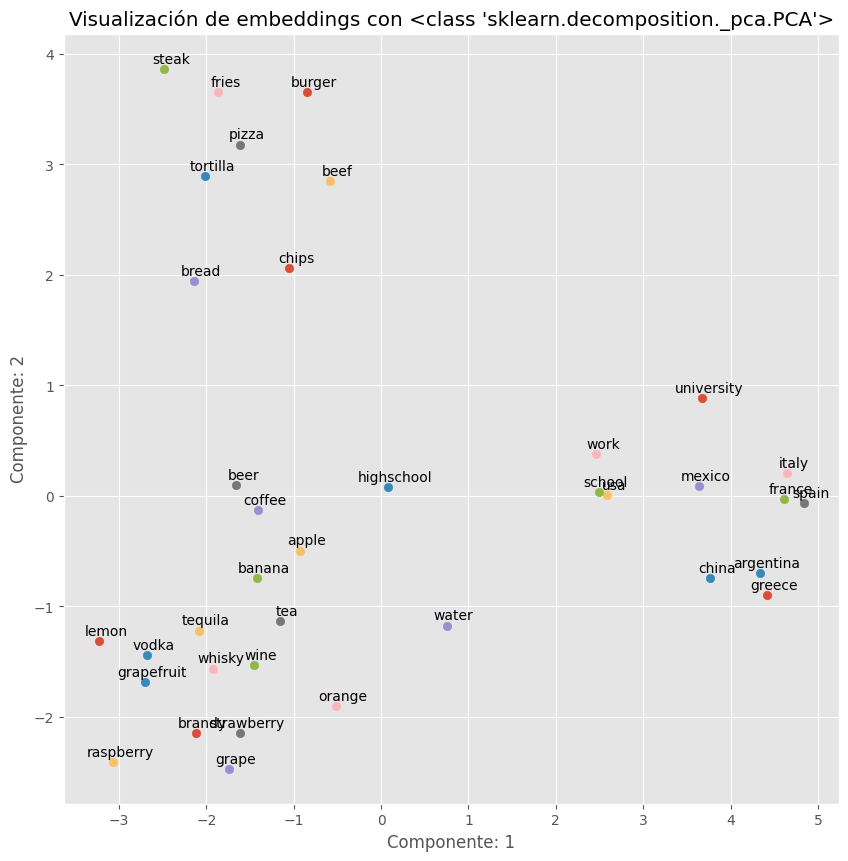

In [132]:
# Se manda a llamar la función "plot_embeddings" con el método de PCA
plot_embeddings(words, embeddings_dict, PCA)

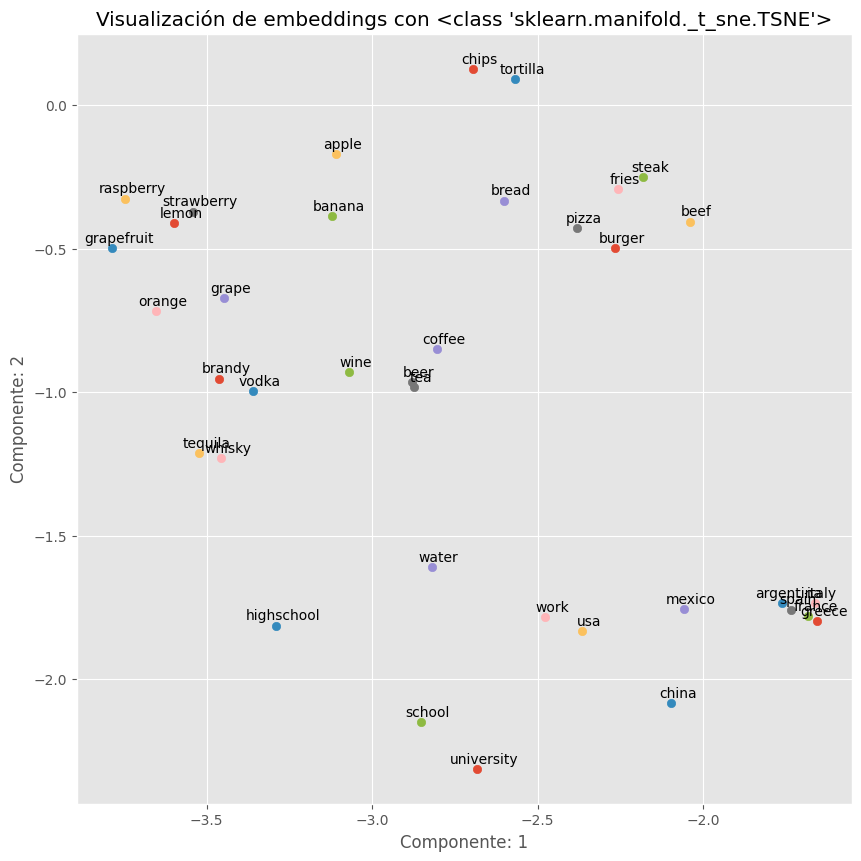

In [133]:
# Se manda a llamar la función "plot_embeddings" con el método de TSNE
embeddings = plot_embeddings(words, embeddings_dict, TSNE)

### Let us compute analogies

In [85]:
def analogy(word1, word2, word3, embeddings_dict):
    ''' Función que busca analogías entre palabras
    Args:
        word1 - una palabra
        word2 - otra palabra
        word3 - y otra palabra
        embeddings_dict - diccionario de los embeddings
    Return:
        closest_word - la palabra más cercana al vector objetivo
    '''
    # Se obtienen embeddings para cada palabra
    for word in [word1, word2, word3]:
        if word not in embeddings_dict:
            return (f"La palabra '{word}' no se encuentra en el diccionario de embeddings.")

    # Se calculan vectores de analogía
    word1_embedding = np.array(embeddings_dict[word1])
    word2_embedding = np.array(embeddings_dict[word2])
    word3_embedding = np.array(embeddings_dict[word3])

    # Se calcula el vector objetivo -> emb_word2 - emb_word1 + emb_word3
    target_vector = word2_embedding - word1_embedding + word3_embedding

    closest_word = None
    min_distance = float('inf')

    # Se itera sobre el diccionario de embeddings para encontrar la palabra más cercana al vector objetivo
    for word in embeddings_dict.keys():
        # Se verifica que no sea la misma palabra para hacer el cálculo
        if word not in [word1, word2, word3]:
            actual_we = np.array(embeddings_dict[word])
            # Se obtiene la distancia entre el embeeding de la palabra actual y el 'target_vector'
            distance = np.linalg.norm(target_vector - actual_we)

            # Si dicha distancia fue menor, se actualiza 'min_distance' y 'closest_word'
            if distance < min_distance:
                min_distance = distance
                closest_word = word

    # Se regresa la palabra más cercana al vector objetivo
    return closest_word

In [86]:
# Se manda a llamar la función de "analogy" con 'man', 'king' y 'woman'. Se espera: 'queen'
analogy('man', 'king', 'woman', embeddings_dict)

'queen'

In [87]:
def find_most_similar(word, embeddings_dict, top_n=10):
    ''' Función para encontrar las N palabras más similares a una palabra
        en específico, basado en sus embeddings.
    Args:
        word - la palabra con la que se desea trabajar
        embeddings_dict - diccionario de los embeddings
        top_n - la cantidad de palabras similares que se desea encontrar 
                (10 por default)
    Return:
        most_similar_words - el arreglo con las palabras similares
    '''
    # Checar si se puede trabajar con la palabra dada
    if word not in embeddings_dict:
        return (f"La palabra '{word}' no se encuentra en el diccionario de embeddings.")

    # Vector de embeddings para la palabra dada
    word_embedding = np.array(embeddings_dict[word])

    # Se calcula la similitud con todas las otras palabras
    similarities = {}
    for actual_word, actual_embedding in embeddings_dict.items():
        # Se verifica que no sea la misma palabra
        if actual_word != word:
            actual_embedding = np.array(actual_embedding)
            # Se obtiene la similitud entre 'actual_embedding' y 'word_embedding' (esto se hace con 1 - distancia coseno)
            sim = 1 - cosine(word_embedding, actual_embedding)

            # Se agrega dicha similitud a la palabra actual, dentro del diccionario de similitudes
            similarities[actual_word] = sim

    # Se ordena 'similarities'
    most_similar_words = sorted(similarities, key=similarities.get, reverse=True)[:top_n]
    
    return most_similar_words

In [88]:
# Se manda a llamar "find_most_similar" para la palabra: "mexico". (Se van a devolver las 10 palabras más similares por default).
most_similar = find_most_similar('mexico', embeddings_dict)

In [90]:
# Se imprimen las palabrras similares (a "mexico" en este caso) encontradas. De la mas similar a la menos similar
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> guatemala
5 ---> peru
6 ---> chile
7 ---> argentina
8 ---> veracruz
9 ---> brazil
10 ---> america
